# Problem Statement :
    
      The dataset is related to Red and White variants of the Portuguese "Vinho Verde" wind. Due to privacy and Logistic issues,  only physicochemical(inputs) and sensory(the output) variables are available.(e.g. There are no data about Grape types,wine brand and selling price, etc.)
      This process can be viewed as classification task. The classes are ordered and not balanced.(e.g. There are many more normal wines than excellent or poor ones.). Also we are not sure if all input variables are relevents. So it could be interesting to test feature selection methods.
            

# Attribute Information :

Input Variables(are based on Physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulphur dioxide
7. total sulphur dioxide
8. density
9. pH
10. sulphates
11. alchohol

Output Variable(vased on Sensory data):
12. quality(score between 0 and 10)

# Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Display top 5 rows of Dataset

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Display bottom 5 rows of Dataset

In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Checking for Null Values in Dataset

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The output shows that there are no null values in our data. So we can move ahead for further processing.

# Overall Statistics of Dataset

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
import warnings
warnings.filterwarnings('ignore')

# Visualization of Data

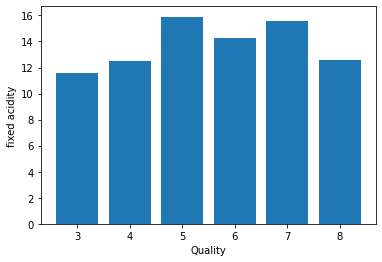

In [9]:
# fixed acidity and quality
plt.bar(data['quality'],data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.show()

In [ ]:
From the above boxplot we can say that the quality of wine improves as fixed acidity increases.

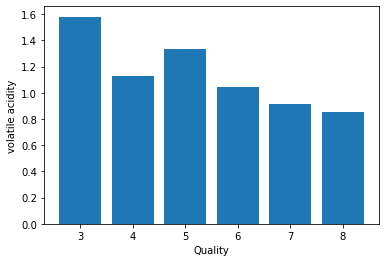

In [11]:
# volatile acidity and quality
plt.bar(data['quality'],data['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('volatile acidity')
plt.show()

Here, the volatile acidity is inversly propotional to the quality of wine means quality of wine decreases as increase in volatile acidity.

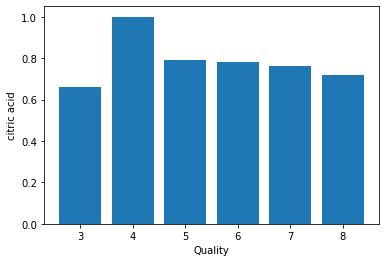

In [12]:
# citric acid and quality
plt.bar(data['quality'],data['citric acid'])
plt.xlabel('Quality')
plt.ylabel('citric acid')
plt.show()

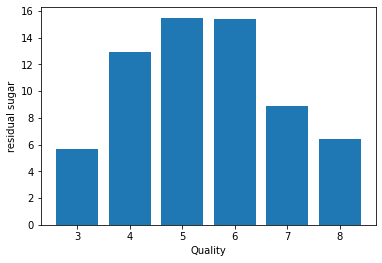

In [13]:
# residual sugar and quality
plt.bar(data['quality'],data['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('residual sugar')
plt.show()

In [ ]:
It shows that less the quantity of sugar the better is the quality of wine

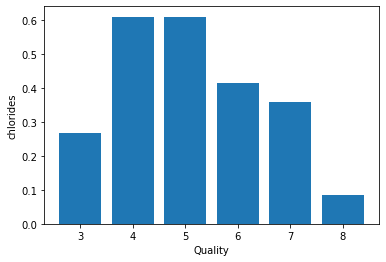

In [14]:
# chlorides and quality
plt.bar(data['quality'],data['chlorides'])
plt.xlabel('Quality')
plt.ylabel('chlorides')
plt.show()

In [ ]:
It shows that less the quantity of chlorides presents the better is the quality of wine

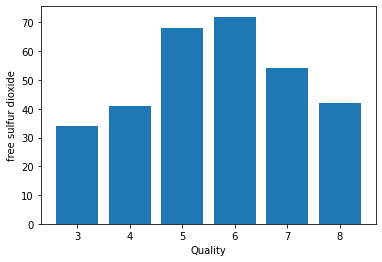

In [15]:
# free sulfur dioxide and quality
plt.bar(data['quality'],data['free sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('free sulfur dioxide')
plt.show()

In [ ]:
The above barplot shows that increase in free sulfur dioxide results in increased quality of wine

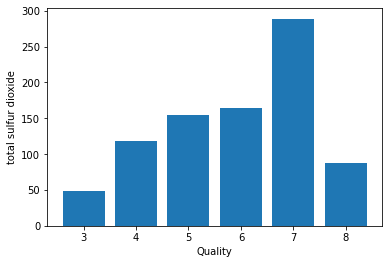

In [16]:
# total sulfur dioxide and quality
plt.bar(data['quality'],data['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('total sulfur dioxide')
plt.show()

In [ ]:
The above barplot shows that increase in total sulfur dioxide results in increased quality of wine

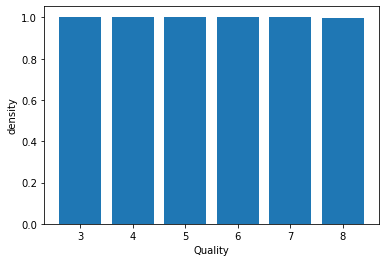

In [17]:
# density and quality
plt.bar(data['quality'],data['density'])
plt.xlabel('Quality')
plt.ylabel('density')
plt.show()

In [ ]:
Density is equally proportional to quality of wine.

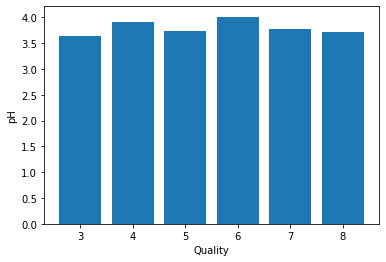

In [18]:
# pH and quality
plt.bar(data['quality'],data['pH'])
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

In [ ]:
The above barplot shows that increase in free pH results in increased quality of wine

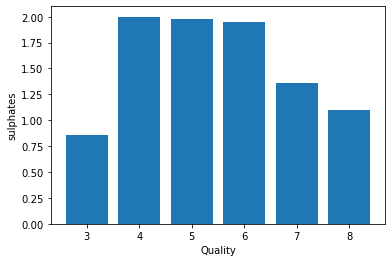

In [19]:
# sulphates and quality
plt.bar(data['quality'],data['sulphates'])
plt.xlabel('Quality')
plt.ylabel('sulphates')
plt.show()

In [ ]:
The above barplot shows that increase in free sulphates results in increased quality of wine

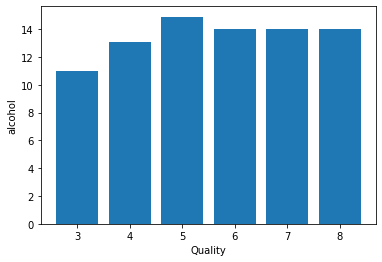

In [18]:
# alcohol and quality
plt.bar(data['quality'],data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('alcohol')
plt.show()

In [ ]:
It shows that quality of wine increases with increase in alcohol means higher the quality of alcohol better the quality of wine.

# Correlation Matrix

<AxesSubplot:>

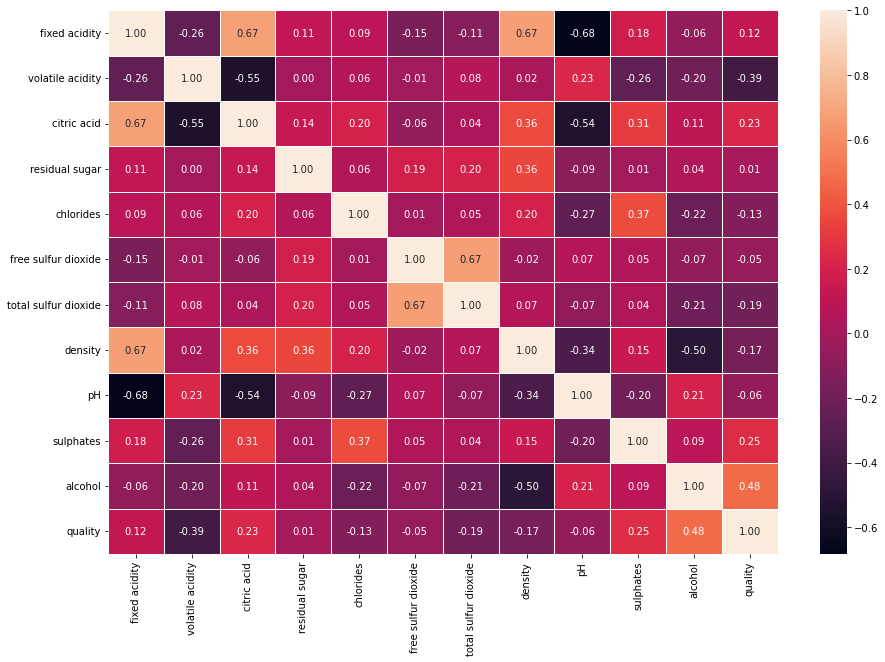

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot = True,linewidth = 0.5,fmt = '0.2f')

In [21]:
data.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [22]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Binarization of Target Variable

In [24]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

There are total 6 unique values in the target column and we have to convert them into two values 0 and 1.
value 1 for 'good' quality' wine and 0 for 'notgood' quality. 
The condition for binarization is :
    if the quality of wine >= 7 then it is of 'good' quality
    if the quality of wine < 7 then it is of 'notgood' quality.

In [25]:
data['quality'] = [1 if x >= 7 else 0 for x in data ['quality']]

In [26]:
data['quality'].unique()

array([0, 1], dtype=int64)

In [27]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Checking For Outliers

In [28]:
colllist = data.columns.values
ncol = 6
nrows = 2

In [29]:
colllist

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [30]:
len(colllist)

12

In [31]:
len(list(range(0,len(colllist))))

12

In [32]:
for i in range (0,len(colllist)):
    print(colllist[i])
    break

fixed acidity


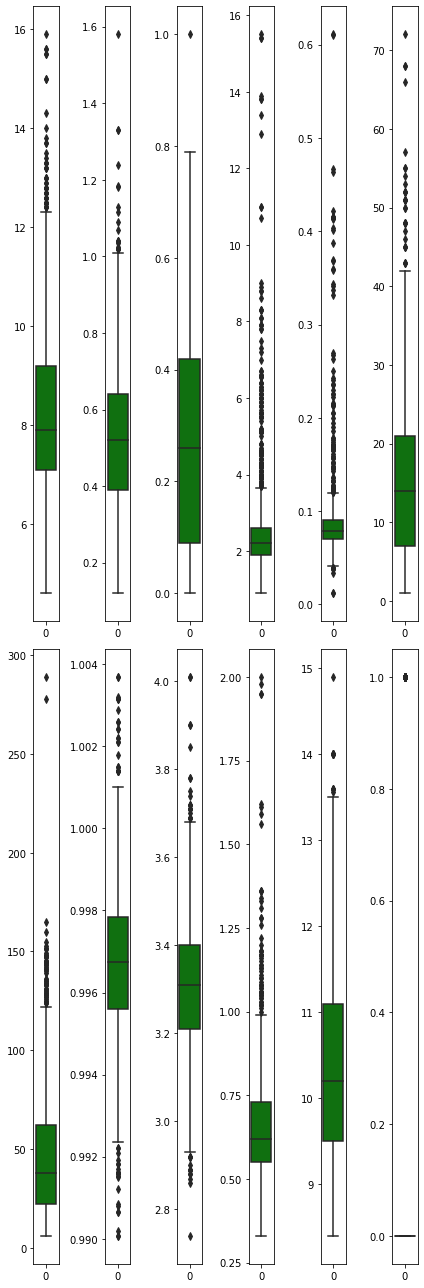

In [33]:
plt.figure(figsize = (ncol,3*ncol))
for i in range(0,len(colllist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data[colllist[i]],color = 'green',orient = 'v')
    plt.tight_layout()

In [34]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [35]:
from scipy.stats import zscore

In [36]:
z = np.abs(zscore(data))

In [37]:
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.396256
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.396256
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.396256
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.396256
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.396256
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.396256
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.396256


In [38]:
z.shape

(1599, 12)

In [39]:
data_new = data[(z<3).all(axis = 1)]

In [40]:
data_new.shape

(1458, 12)

In [41]:
print("Old Dataframe",data.shape)
print("New Dataframe",data_new.shape)
print("Total dropped rows",data.shape[0]-data_new.shape[0])

Old Dataframe (1599, 12)
New Dataframe (1458, 12)
Total dropped rows 141


# Percentage Data loss

In [42]:
percent_loss = (1599-1491)/1599*100
print(percent_loss,'%')

6.75422138836773 %


The model with Outliesr is data and the model with desired outliers is data_new

In [43]:
data_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Dividing data in Features and Target variable

In [44]:
# Features/Independent Variables
x = data.iloc[:,:-1]

In [45]:
#Target/Dependent Variable
y = data.iloc[:,-1]

In [46]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [47]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

# Transforming data to remove skewness

In [48]:
from sklearn.preprocessing import power_transform

In [49]:
x = power_transform(x,method = 'yeo-johnson')

In [50]:
type(x)

numpy.ndarray

In [51]:
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

In [52]:
x.ndim

2

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568965e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
        -7.09517433e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054073e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
         7.18868617e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
         1.63859528e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831617e-01,  2.56369273e-01,  7.34557526e-01]])

# Handling of Imbalanced Dataset

In [55]:
data.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

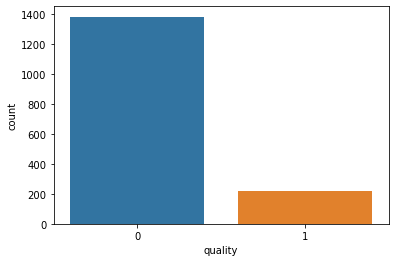

In [57]:
sns.countplot(data['quality'])

In [ ]:
from the countplot we can say that our dataset is highly imbalanced.
Hence, we have to balance the dataset first.
Here we are going to use Over sampling technique using SMOTE.
SMOTE stands for Synthetic Minority OverSampling Technique. The advantage of SMOTE is that we are not generating duplicates but rather creating synthetic datapoints that are slightly different from original datapoints.


In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [60]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.20,random_state = 45)

In [64]:
dt = DecisionTreeClassifier()

In [65]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
dt.score(x_train,y_train)

1.0

In [92]:
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.891500904159132

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' : range(10,15),
    'min_samples_leaf' : range(2,6),
    'min_samples_split' : range(3,8),
    'max_leaf_nodes' : range(5,10)
}

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
grid_search = GridSearchCV(estimator = dt,
                          param_grid = grid_param,
                          n_jobs = -1)

In [99]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [100]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


# Model Confidence/Accuracy

In [101]:
from sklearn.metrics import classification_report

In [102]:
def metric_score(dt,x_train,x_test,y_train,y_test,train=True):
    if train :
        y_pred = dt.predict(x_train)
        print("\n===============Train Result===============")
        print(f"Accuracy Score :{accuracy_score(y_train,y_pred)*100:0.2f}%")
        
    elif train==False:
        pred = dt.predict(x_test)
        print("\n===============Test Result===============")
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits = 2))

In [103]:
# Initiate Decision Tree Classifier with new parameters and train
dt = DecisionTreeClassifier(criterion = 'gini',min_samples_split = 3,max_depth = 10,min_samples_leaf = 2)

# Train the model
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [106]:
#Check train & test score
# For training score
metric_score(dt,x_train,x_test,y_train,y_test,train = True)

# For testing score
metric_score(dt,x_train,x_test,y_train,y_test,train= False)


===============Train Result===============
Accuracy Score :97.15%

===============Test Result===============

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       255
           1       0.89      0.90      0.90       298

    accuracy                           0.89       553
   macro avg       0.89      0.89      0.89       553
weighted avg       0.89      0.89      0.89       553



In [107]:
# Accuracy Score
accuracy_score(y_test,y_pred)

0.891500904159132

In [108]:
# Precision Score
precision_score(y_test,y_pred)

0.8966666666666666

In [109]:
# Recall Score
recall_score(y_test,y_pred)

0.9026845637583892

In [110]:
# f1 Score
f1_score(y_test,y_pred)

0.8996655518394648

In [132]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       255
           1       0.90      0.90      0.90       298

    accuracy                           0.89       553
   macro avg       0.89      0.89      0.89       553
weighted avg       0.89      0.89      0.89       553



In [118]:
pred_dt = dt.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_dt)

In [119]:
for j in range(4,10):
    lsscore = cross_val_score(dt,x,y,cv = j)
    print(lsscore)
    lsc = lsscore.mean()
    print("At cv :- ",j)
    print("Cross validation score is :- ",lsc*100)
    print("accuracy_score is :- ",lss*100)
    print("\n")

[0.8675     0.86       0.795      0.84962406]
At cv :-  4
Cross validation score is :-  84.3031015037594
accuracy_score is :-  88.96925858951175


[0.865625   0.746875   0.871875   0.790625   0.79937304]
At cv :-  5
Cross validation score is :-  81.48746081504703
accuracy_score is :-  88.96925858951175


[0.86516854 0.80898876 0.85393258 0.83458647 0.82330827 0.83834586]
At cv :-  6
Cross validation score is :-  83.73884148573681
accuracy_score is :-  88.96925858951175


[0.87772926 0.86899563 0.84279476 0.91666667 0.76315789 0.8245614
 0.86403509]
At cv :-  7
Cross validation score is :-  85.11343861838002
accuracy_score is :-  88.96925858951175


[0.875     0.855     0.83      0.91      0.82      0.83      0.89
 0.7839196]
At cv :-  8
Cross validation score is :-  84.92399497487438
accuracy_score is :-  88.96925858951175


[0.85393258 0.89325843 0.79775281 0.81460674 0.92134831 0.78089888
 0.79096045 0.84745763 0.83615819]
At cv :-  9
Cross validation score is :-  83.73748915550476
a

Now we select the cross validation score which is as nearesr as possible to our accuracy score
which is at cv = 9

In [120]:
lsscore_selected = cross_val_score(dt,x,y,cv=9).mean()
print("The cv score is : ",lsscore_selected,"\nThe accuracy score is : ",lss)

The cv score is :  0.8429963957482526 
The accuracy score is :  0.8896925858951176


Since our accuracy score is nearly close to cv score it means that our model does not over fits the data. Hence we can proceed for next steps

In [115]:
from sklearn.metrics import confusion_matrix

In [121]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[224,  31],
       [ 29, 269]], dtype=int64)

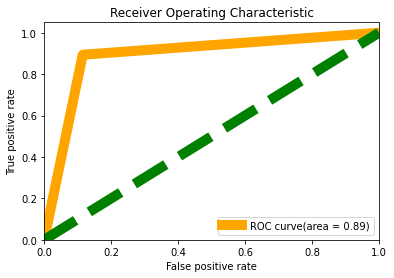

In [122]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_dt,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'orange',lw = 10,label = 'ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='green',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Result : 

1. Our model fits 89% of the data which can be considered as good one.
2. On the basis of correlation we conclude that the physiochemical property 'Alcohol' makes the wine quality better.

# Model Saving

In [2]:
import pickle

In [ ]:
pickle.dump(dt,open('model_save','wb'))